<a href="https://colab.research.google.com/github/daregioia/Management-Quality-and-Firm-Performance-Econometrics/blob/main/Econometrics_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Econometrics
ESSEC Business School

## Homework 1

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/wms-management-survey/clean/"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders (double check you have this on your pc)
data_in = dirname + "/Data/"
data_out = dirname + "/Data/"
output = dirname + "/output/"
func = dirname + "/Settings/"
sys.path.append(func)

# Import the prewritten helper functions
from py_helper_functions import *
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Import data
df = pd.read_csv("/content/wms_da_textbook.csv")

In [ ]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.country.unique()

array(['United States', 'India', 'New Zealand', 'Australia', 'Argentina',
       'Brazil', 'Canada', 'Chile', 'China', 'Germany', 'Spain', 'France',
       'Northern Ireland', 'Great Britain', 'Greece',
       'Republic of Ireland', 'Italy', 'Japan', 'Mexico', 'Poland',
       'Portugal', 'Sweden', 'Singapore', 'Turkey'], dtype=object)

In [ ]:
df.wave.unique()

array([2004, 2006, 2010, 2014, 2005, 2008, 2009, 2012, 2013, 2007, 2015])

In [ ]:
df.loc[lambda x: (x["wave"] == 2014)].country.unique()

array(['United States', 'Germany', 'France', 'Great Britain', 'Greece',
       'Italy', 'Portugal'], dtype=object)

In [ ]:
# Sample selection
df1 = df.loc[
    lambda x: (x["country"] == "France")
    & (x["wave"] == 2014)
]

In [ ]:
df1.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0
mean,4652.574468,2014.0,30.524823,2.996740,2.957447,3.509220,2.941489,2.627660,2.921986,2.992908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,128.837951,0.0,5.255720,0.521241,0.864972,0.693428,0.586392,0.523131,0.971530,0.882338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4445.000000,2014.0,20.000000,1.722222,1.000000,1.800000,1.600000,1.666667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4543.000000,2014.0,26.000000,2.611111,2.500000,3.000000,2.400000,2.333333,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4653.000000,2014.0,32.000000,3.055556,3.000000,3.400000,3.000000,2.500000,3.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4739.000000,2014.0,35.000000,3.388889,3.500000,4.000000,3.200000,3.000000,4.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4923.000000,2014.0,39.000000,4.222222,5.000000,5.000000,4.400000,4.166667,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(df1)

['firmid',
 'wave',
 'cty',
 'country',
 'sic',
 'management',
 'operations',
 'monitor',
 'target',
 'people',
 'lean1',
 'lean2',
 'perf1',
 'perf2',
 'perf3',
 'perf4',
 'perf5',
 'perf6',
 'perf7',
 'perf8',
 'perf9',
 'perf10',
 'talent1',
 'talent2',
 'talent3',
 'talent4',
 'talent5',
 'talent6',
 'emp_firm',
 'firmage',
 'ownership',
 'mne_yn',
 'mne_cty',
 'competition',
 'export',
 'degree_m',
 'degree_nm',
 'degree_t',
 'i_seniority',
 'reliability',
 'aa_1',
 'aa_2',
 'aa_3',
 'aa_4',
 'aa_5',
 'aa_6',
 'aa_7',
 'aa_8',
 'aa_9',
 'aa_10',
 'aa_11',
 'aa_12',
 'aa_13',
 'aa_14',
 'aa_15',
 'aa_16',
 'aa_17',
 'aa_18',
 'aa_19',
 'aa_20',
 'aa_21',
 'aa_22',
 'aa_23',
 'aa_24',
 'aa_25',
 'aa_26',
 'aa_27',
 'aa_28',
 'aa_29',
 'aa_30',
 'aa_31',
 'aa_32',
 'aa_33',
 'aa_34',
 'aa_35',
 'aa_36',
 'aa_37',
 'aa_38',
 'aa_39',
 'aa_40',
 'aa_41',
 'aa_42',
 'aa_43',
 'aa_44',
 'aa_45',
 'aa_46',
 'aa_47',
 'aa_48',
 'aa_49',
 'aa_50',
 'aa_51',
 'aa_52',
 'aa_53',
 'aa_54',
 'a

## Management Quality and Firm Performance

The data for this case study is from a large-scale research project aiming to fill this gap. The World Management Survey (WMS; http://worldmanagementsurvey.org) collects data on management practices from many firms and other organizations across various industries and countries. This is a major international survey that combines a traditional survey methodology with other methods; see Sections 1.5 and 1.6 below on data collection methods.

The most important variables in the WMS are the management practice “scores”. Eighteen such scores are in the data, each measuring the quality of management practices in an important area, such as tracking and reviewing performance, the time horizon and breadth of targets, or attracting and retaining human capital. The scores range from 1 through 5, with 1 indicating worst practice and 5 indicating best practice. Importantly, this is the intended content of the variable. The actual content is determined by how it is measured: what information is used to construct the score, where that information comes from, how the scores are constructed from that information, whether there is room for error in that process, and so on.

## Questions

Part A

We focuse on France, 2014 data. Management scores are in the column "management". The number of employees is in the column "emp_firm".

1. Display an histogram of the "management" scores. Which theoretical distribution could fit?
2. Compute the sample average and sample standard deviation of the "management" score.
3. Display an histogram of the "number of employees". Which theoretical distribution would fit?
4. Find a transformation of the variable "number of employees" such that its distribution looks like a normal distribution. (hint: the closer your distribution to a Normal distribution, the closer its kurtosis to 3)

Part B: finding associations

We now measure management quality by the "management" variable and firm size by the "emp_firm" variable.

5. Divide the firm size into three quantiles with roughly the same number of observations in the three quantiles. Call these three sets small, intermediate and big firms respectively.
6. Compute the average management score for small, intermediate and big firms.
7. Test if there is a significant difference in management score between big and small firms.
8. Create a scatter plot between firm size and management score.
9. Create a scatter plot between log(firm size) and management score.
10. Compute the correlations between the variables at point 8 and 9. Comment.


Part C: simple regression

11. Consider a linear regression based on the model explaining management score by firm size (point 8). Estimate the linear model using OLS.
12. Repeat the estimate in point 11 now in a model in which management score is explained by log(firm size) (point 9).
13. Compare the R^2 of the two regressions. Explain.

Part D: choose your country/year

14. Repeat the analysis of part C with your favourite country in the most recent year at your disposal. Please make sure you have at least 100 data entries. Are your results consistent with France in 2014?




## Part A

### Question 1

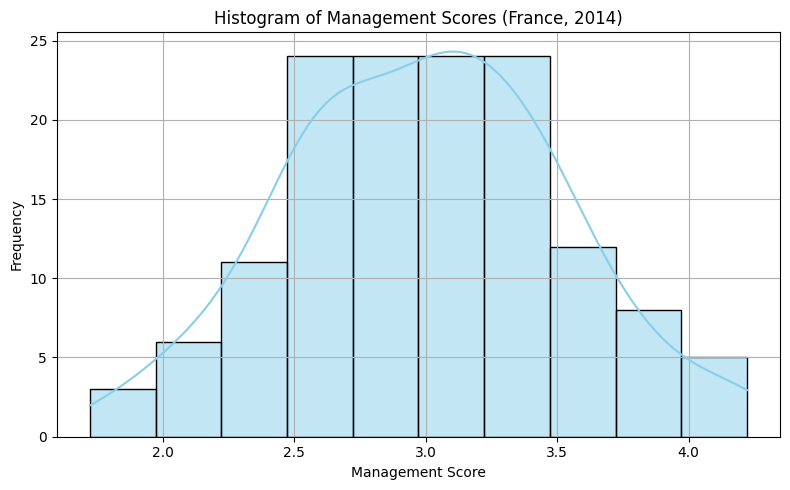

In [ ]:
import seaborn as sns

# Filter for France, 2014
df_fr_2014 = df[(df["country"] == "France") & (df["wave"] == 2014)]

# Plot histogram of the "management" scores
plt.figure(figsize=(8, 5))
sns.histplot(df_fr_2014["management"], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Management Scores (France, 2014)")
plt.xlabel("Management Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

The distribution of management scores in France (2014) is roughly symmetric and bell-shaped, resembling a truncated normal distribution limited between 1 and 5. The highest concentration of scores is around 3, indicating that most firms exhibit average levels of management quality.

### Question 2

In [ ]:
# Compute sample mean and standard deviation of management scores
mean_mgmt = df_fr_2014["management"].mean()
std_mgmt = df_fr_2014["management"].std()

print("Sample Mean of Management Score:", round(mean_mgmt, 3))
print("Sample Standard Deviation of Management Score:", round(std_mgmt, 3))


Sample Mean of Management Score: 2.997
Sample Standard Deviation of Management Score: 0.521


The average management score for French firms in 2014 is approximately 3.00, with a standard deviation of 0.52. Given the previously noted normal-like distribution, this suggests the majority of businesses use moderate management techniques, with scores often falling between about 2.5 and 3.5.

### Question 3

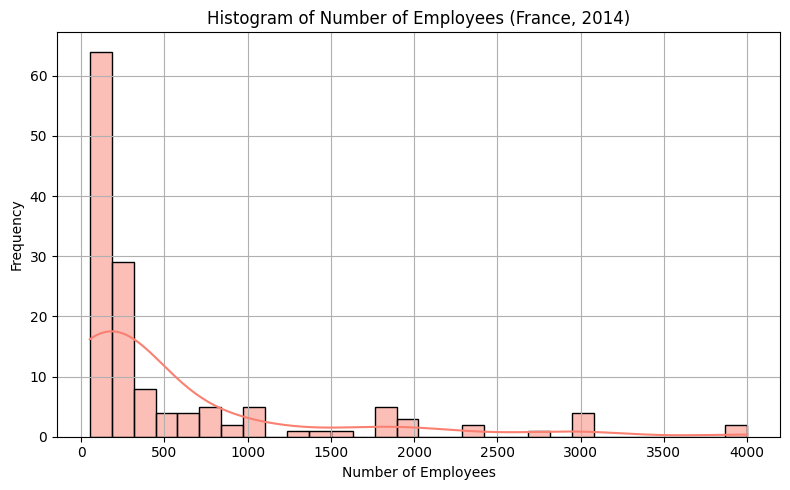

In [ ]:
# Plot histogram of the number of employees
plt.figure(figsize=(8, 5))
sns.histplot(df_fr_2014["emp_firm"], bins=30, kde=True, color='salmon')
plt.title("Histogram of Number of Employees (France, 2014)")
plt.xlabel("Number of Employees")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


The distribution of the number of employees is highly right-skewed, with many small firms and a few very large ones.

### Question 4

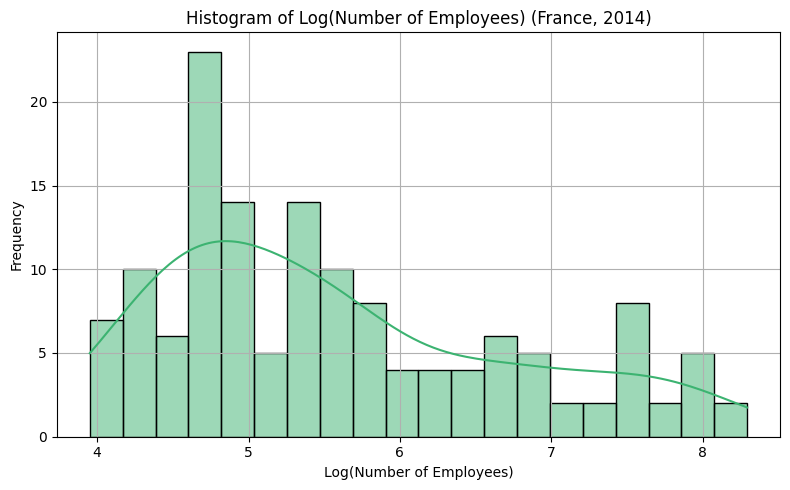

In [ ]:
# Apply log transformation to number of employees
df_fr_2014["log_emp_firm"] = np.log(df_fr_2014["emp_firm"])

# Plot histogram of log-transformed number of employees
plt.figure(figsize=(8, 5))
sns.histplot(df_fr_2014["log_emp_firm"], bins=20, kde=True, color='mediumseagreen')
plt.title("Histogram of Log(Number of Employees) (France, 2014)")
plt.xlabel("Log(Number of Employees)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Applying the natural logarithm to the number of employees significantly reduces skewness and brings the distribution closer to normal.

## Part B

### Question 1

In [ ]:
# Create firm size categories based on tertiles (quantile-based bins)
df_fr_2014["size_category"] = pd.qcut(df_fr_2014["emp_firm"], q=3, labels=["Small", "Intermediate", "Big"])

# Display how many firms fall into each category
print(df_fr_2014["size_category"].value_counts())


size_category
Small           47
Intermediate    47
Big             47
Name: count, dtype: int64


### Question 2

In [ ]:
# Compute average management score by firm size category
avg_mgmt_by_size = df_fr_2014.groupby("size_category")["management"].mean().round(3)

print("Average Management Score by Firm Size Category:")
print(avg_mgmt_by_size)


Average Management Score by Firm Size Category:
size_category
Small           2.776
Intermediate    2.910
Big             3.304
Name: management, dtype: float64


The average management score increases with firm size:

Small firms: 2.776

Intermediate firms: 2.910

Big firms: 3.304

This suggests that larger firms tend to have better management practices, on average.

### Question 3

In [ ]:
from scipy.stats import ttest_ind

# Extract management scores for small and big firms
small_scores = df_fr_2014[df_fr_2014["size_category"] == "Small"]["management"]
big_scores = df_fr_2014[df_fr_2014["size_category"] == "Big"]["management"]

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(big_scores, small_scores, equal_var=False)  # Welch's t-test

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))


T-statistic: 5.03
P-value: 0.0


The statistical significance of the difference in management scores between large and small enterprises is confirmed by a two-sample t-test (t = 5.03, p < 0.001). This lends credence to the notion that larger companies typically employ superior management techniques.

### Question 4

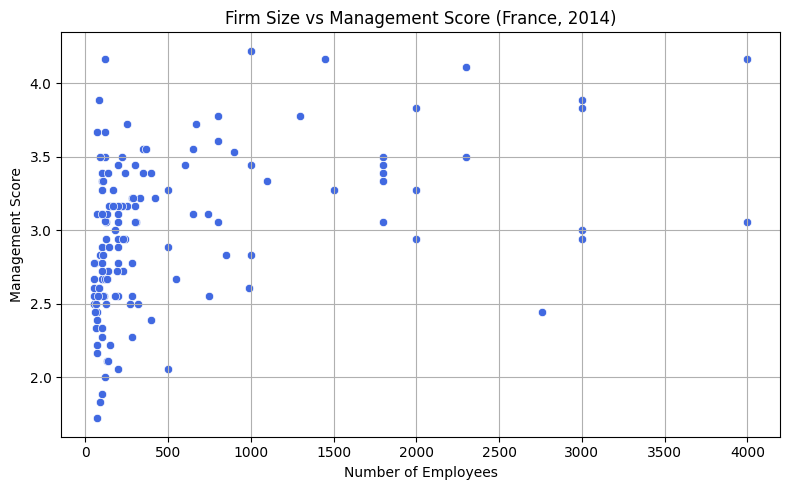

In [ ]:
# Scatter plot of firm size vs management score
plt.figure(figsize=(8, 5))
sns.scatterplot(x="emp_firm", y="management", data=df_fr_2014, color='royalblue')
plt.title("Firm Size vs Management Score (France, 2014)")
plt.xlabel("Number of Employees")
plt.ylabel("Management Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 5

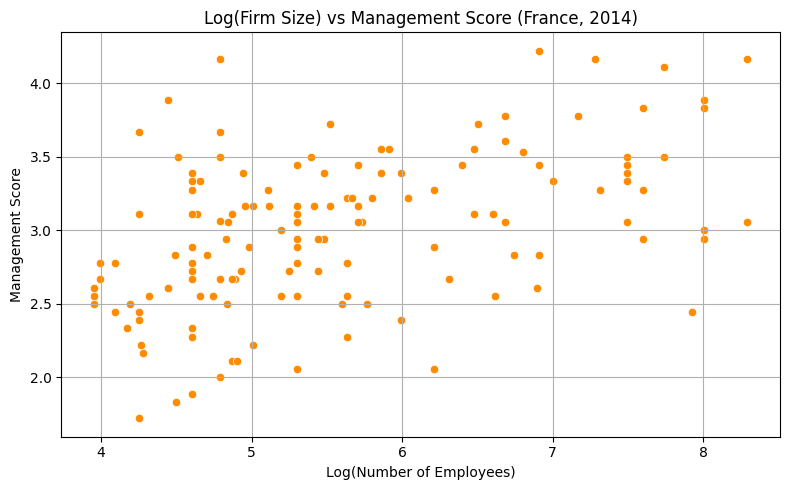

In [ ]:
# Scatter plot of log(firm size) vs management score
plt.figure(figsize=(8, 5))
sns.scatterplot(x="log_emp_firm", y="management", data=df_fr_2014, color='darkorange')
plt.title("Log(Firm Size) vs Management Score (France, 2014)")
plt.xlabel("Log(Number of Employees)")
plt.ylabel("Management Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In contrast to the untransformed version, the scatter plot of log(firm size) and management score shows a more pronounced positive linear association. This implies that management methods tend to get better as businesses get bigger (on a log scale). A better statistical and visual fit is made possible by the log transformation, which also lessens skewness.

### Question 6

In [ ]:
# Compute correlations
corr_raw = df_fr_2014["emp_firm"].corr(df_fr_2014["management"])
corr_log = df_fr_2014["log_emp_firm"].corr(df_fr_2014["management"])

print("Correlation between firm size and management score:", round(corr_raw, 3))
print("Correlation between log(firm size) and management score:", round(corr_log, 3))


Correlation between firm size and management score: 0.39
Correlation between log(firm size) and management score: 0.474


The correlation between firm size and management score is 0.39, indicating a moderate positive relationship. After applying a log transformation, the correlation increases to 0.474, suggesting a stronger linear association. This confirms that using log(firm size) better captures the relationship with management quality, likely due to reduced skewness and outlier influence.

## Part C

### Question 1

In [ ]:
import statsmodels.api as sm

# Define X and y
X_raw = df_fr_2014["emp_firm"]
y = df_fr_2014["management"]

# Add constant for intercept
X_raw = sm.add_constant(X_raw)

# Run OLS regression
model_raw = sm.OLS(y, X_raw).fit()

# Display regression summary
print(model_raw.summary())


                            OLS Regression Results                            
Dep. Variable:             management   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     24.92
Date:                Tue, 27 May 2025   Prob (F-statistic):           1.76e-06
Time:                        12:49:24   Log-Likelihood:                -96.077
No. Observations:                 141   AIC:                             196.2
Df Residuals:                     139   BIC:                             202.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8576      0.049     58.048      0.0

The regression of management score on firm size yields an R² of 0.152, indicating that firm size explains about 15.2% of the variation in management quality.
The coefficient for emp_firm is 0.0002 and statistically significant (p < 0.001), suggesting a positive but very small effect of firm size on management score.

### Question 2

In [ ]:
# Define X and y
X_log = df_fr_2014["log_emp_firm"]
y = df_fr_2014["management"]

# Add constant for intercept
X_log = sm.add_constant(X_log)

# Run OLS regression
model_log = sm.OLS(y, X_log).fit()

# Display regression summary
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:             management   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     40.37
Date:                Tue, 27 May 2025   Prob (F-statistic):           2.80e-09
Time:                        12:49:26   Log-Likelihood:                -89.726
No. Observations:                 141   AIC:                             183.5
Df Residuals:                     139   BIC:                             189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7978      0.193      9.332   

### Question 3

In addition to reflecting the non-linear character of the link between firm size and management practices, the model that uses log(firm size) offers a better match (R² = 0.225 vs. 0.152). In addition to enhancing linearity, log transformation lessens the impact of extreme firm sizes.

## Part D

### Question 1

In [ ]:
# Count number of observations per country and wave
obs_counts = df.groupby(["country", "wave"]).size().reset_index(name="count")

# Filter for combinations with at least 100 observations
sufficient_data = obs_counts[obs_counts["count"] >= 100].sort_values(by=["country", "wave"], ascending=[True, False])

sufficient_data


,country,wave,count
1,Argentina,2013,319
0,Argentina,2010,249
2,Australia,2009,453
5,Brazil,2013,560
4,Brazil,2008,591
6,Canada,2008,419
8,Chile,2013,239
7,Chile,2009,372
12,China,2015,309
11,China,2010,221


The selected country is: SPAIN 2013, (n= 214)

### Step 1

In [ ]:
# Filter for Spain, 2013
df_es_2013 = df[(df["country"] == "Spain") & (df["wave"] == 2013)]

# Add log(firm size)
df_es_2013["log_emp_firm"] = np.log(df_es_2013["emp_firm"])

### Step 2

In [ ]:
# Drop rows with missing values in emp_firm or management
df_es_clean = df_es_2013[["emp_firm", "management"]].dropna()

# Define X and y
X_es_raw = sm.add_constant(df_es_clean["emp_firm"])
y_es = df_es_clean["management"]

# Run regression
model_es_raw = sm.OLS(y_es, X_es_raw).fit()
print("Regression: Management ~ Firm Size")
print(model_es_raw.summary())


Regression: Management ~ Firm Size
                            OLS Regression Results                            
Dep. Variable:             management   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 27 May 2025   Prob (F-statistic):           1.27e-05
Time:                        12:49:40   Log-Likelihood:                -189.73
No. Observations:                 214   AIC:                             383.5
Df Residuals:                     212   BIC:                             390.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.

### Step 3

In [ ]:
# Add log(firm size) to the clean DataFrame
df_es_clean["log_emp_firm"] = np.log(df_es_clean["emp_firm"])

# Regression with log(firm size)
X_es_log = sm.add_constant(df_es_clean["log_emp_firm"])
y_es = df_es_clean["management"]

model_es_log = sm.OLS(y_es, X_es_log).fit()
print("\nRegression: Management ~ Log(Firm Size)")
print(model_es_log.summary())



Regression: Management ~ Log(Firm Size)
                            OLS Regression Results                            
Dep. Variable:             management   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     32.77
Date:                Tue, 27 May 2025   Prob (F-statistic):           3.52e-08
Time:                        12:49:42   Log-Likelihood:                -183.99
No. Observations:                 214   AIC:                             372.0
Df Residuals:                     212   BIC:                             378.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

In Spain (2013), results are consistent with France (2014).
The regression of management score on raw firm size yields a low R² of 0.086, while using log(firm size) substantially improves the fit (R² = 0.134).
This confirms that the logarithmic relationship between firm size and management quality is more linear and informative, validating the earlier findings across different contexts. Additionally, the comparison of the Adjusted R squared lead to the same conclusion.